<a href="https://colab.research.google.com/github/SobiaNoorAI/Sentiment-Analysis-on-IMDB-Movie-Reviews/blob/main/notebooks/Sentiment_Analysis_By_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDb Movie Reviews

# 1. Install Required Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import nltk
import sklearn
import wordcloud

# 2. Load and Explore

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/SobiaNoorAI/Sentiment-Analysis-on-IMDB-Movie-Reviews/main/Data/IMDB%20Dataset.csv')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
# Check class distribution
print(df['sentiment'].value_counts())

sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review          50000 non-null  object
 1   sentiment       50000 non-null  object
 2   cleaned_review  50000 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


# 3. Data Preprocessing

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.duplicated().sum()

np.int64(418)

In [11]:
import nltk
nltk.download('punkt_tab')  # Tokenization
nltk.download('stopwords')  # Stopword removal
nltk.download('wordnet')  # Lemmatization

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [13]:

# Initialize Stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function for text cleaning
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Tokenization
    text = [stemmer.stem(word) for word in text if word not in stop_words]  # Remove stopwords and apply stemming
    return " ".join(text)

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)


In [18]:
# Display first original & cleaned review
print(df['review'].iloc[0])
print(df['cleaned_review'].iloc[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

# 4. Exploratory Data Analysis (EDA)

✅ Sentiment Distribution

<ipython-input-19-94e9253a9829>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="viridis")


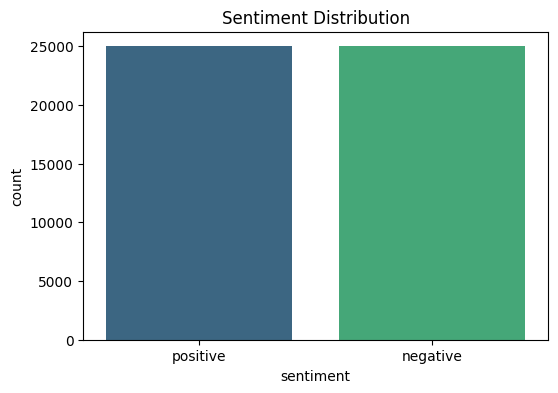

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette="viridis")
plt.title("Sentiment Distribution")
plt.show()

Word Frequency Visualization

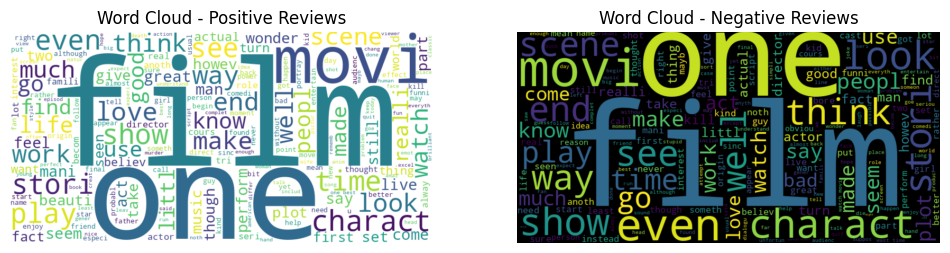

In [20]:
from wordcloud import WordCloud

# WordCloud for Positive Reviews
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['cleaned_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

# WordCloud for Negative Reviews
negative_reviews = " ".join(df[df['sentiment'] == 'negative']['cleaned_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_reviews)

# Plot Word Clouds
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(wordcloud_pos, interpolation="bilinear")
ax[0].set_title("Word Cloud - Positive Reviews")
ax[0].axis("off")

ax[1].imshow(wordcloud_neg, interpolation="bilinear")
ax[1].set_title("Word Cloud - Negative Reviews")
ax[1].axis("off")

plt.show()
